In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import os
from subprocess import call
import seaborn as sns
from matplotlib import pyplot as plt

### Creare fasta file

In [2]:
fin = open('../data/external/kallisto/homo_sapiens/Homo_sapiens.GRCh38.cdna.all.fa')
flines = fin.readlines()
fin.close()

In [5]:
fout = open('../data/external/kallisto/homo_sapiens_ercc.fa', 'w')
for line in flines:
    fout.write(line)
fin = open('../data/external/ERCC92/ERCC92.fa', 'r')
flines = fin.readlines()
fin.close()
for line in flines:
    fout.write(line)
fout.close()

### Indexing

In [6]:
!kallisto index -i ../data/external/kallisto/transcripts.idx ../data/external/kallisto/homo_sapiens_ercc.fa


[build] loading fasta file ../data/external/kallisto/homo_sapiens_ercc.fa
[build] k-mer length: 31
[build] warning: clipped off poly-A tail (longer than 10)
        from 1522 target sequences
[build] warning: replaced 6 non-ACGUT characters in the input sequence
        with pseudorandom nucleotides
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 1131979 contigs and contains 109622116 k-mers 



In [3]:
fnames = os.listdir('../data/spike-in/')
sufix = '_sequence.txt.gz'
fnames = [x[:-len(sufix)-1] for x in fnames]
fnames = list(set(fnames))

In [43]:
for fname_ in fnames:
    os.mkdir('../results/ercc/' + fname_[:-1])

In [50]:
for fname_ in fnames:
    print(fname_)
    call(['kallisto', 'quant', 
          '-i', '../data/external/kallisto/transcripts.idx',
          '-o', '../results/ercc/'+fname_[:-1],
          '../data/spike-in/'+fname_+'1'+sufix, 
          '../data/spike-in/'+fname_+'2'+sufix])

JVL68_Drop_14_21s004414-1-1_Du_lane121s004414_
JVL68_Drop_9_21s004409-1-1_Du_lane121s004409_
JVL68_Drop_15_21s004415-1-1_Du_lane121s004415_
JVL68_Drop_2_21s004402-1-1_Du_lane121s004402_
JVL68_Drop_12_21s004412-1-1_Du_lane121s004412_
JVL68_Drop_11_21s004411-1-1_Du_lane121s004411_
JVL68_Drop_5_21s004405-1-1_Du_lane121s004405_
JVL68_Drop_8_21s004408-1-1_Du_lane121s004408_
JVL68_Drop_1_21s004401-1-1_Du_lane121s004401_
JVL68_Drop_10_21s004410-1-1_Du_lane121s004410_
JVL68_Drop_13_21s004413-1-1_Du_lane121s004413_
JVL68_Drop_6_21s004406-1-1_Du_lane121s004406_
JVL68_Drop_4_21s004404-1-1_Du_lane121s004404_
JVL68_Drop_3_21s004403-1-1_Du_lane121s004403_
JVL68_Drop_7_21s004407-1-1_Du_lane121s004407_


In [47]:
temp = pd.read_csv('../results/ercc/JVL68_Drop_7_21s004407-1-1_Du_lane121s004407/abundance.tsv', sep='\t', header=0, index_col=0)

In [48]:
temp.tail(92)['tpm'].sum()

104.0154

In [4]:
results = pd.DataFrame(index=fnames, columns=['ID', 'ERCC'])
for fname_ in fnames:
    temp = pd.read_csv('../results/ercc/%s/abundance.tsv' % fname_[:-1], sep='\t', header=0, index_col=0)
    n = int(fname_.split('_')[2])
    results.loc[fname_] = n, temp.tail(92)['tpm'].sum()

In [5]:
results['Group'] = (results['ID']-1) // 5 + 1
mapping = {3:150, 2:250, 1:500}
results['Cell per droplet'] = results['Group'].map(mapping)
results['ERCC logTPM'] = np.log10(results['ERCC'].astype(float)+1)

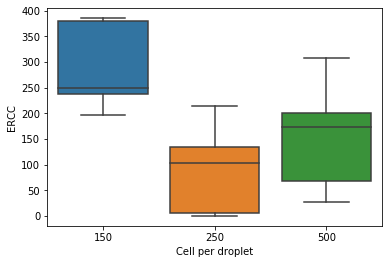

In [81]:
sns.boxplot(x='Cell per droplet', y='ERCC', data=results)
plt.savefig('../figures/temp/ercc.pdf')

In [7]:
results.sort_values('ID')

,ID,ERCC,Group,Cell per droplet,ERCC logTPM
JVL68_Drop_1_21s004401-1-1_Du_lane121s004401_,1,68.4028,1,500,1.841377
JVL68_Drop_2_21s004402-1-1_Du_lane121s004402_,2,173.843,1,500,2.242649
JVL68_Drop_3_21s004403-1-1_Du_lane121s004403_,3,201.009,1,500,2.305371
JVL68_Drop_4_21s004404-1-1_Du_lane121s004404_,4,26.4356,1,500,1.438314
JVL68_Drop_5_21s004405-1-1_Du_lane121s004405_,5,308.311,1,500,2.490395
JVL68_Drop_6_21s004406-1-1_Du_lane121s004406_,6,5.0784,2,250,0.783789
JVL68_Drop_7_21s004407-1-1_Du_lane121s004407_,7,104.015,2,250,2.021253
JVL68_Drop_8_21s004408-1-1_Du_lane121s004408_,8,214.211,2,250,2.332864
JVL68_Drop_9_21s004409-1-1_Du_lane121s004409_,9,135.089,2,250,2.133824
JVL68_Drop_10_21s004410-1-1_Du_lane121s004410_,10,0,2,250,0.000000
